In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import math

In [2]:
def arr_print(x):
    for i in range(len(x)):
        print(x[i], end = "\t")
        if (i % 10 == 9): print()

In [3]:
def group(a0, af, x, int_x, arr_n, arr_w):
    d = af - a0
    print("Интервалы\t\tni\twi")
    boof = a0
    ind = 0
    sum = 0
    sum1 = 0
    int_x.append(a0)
    for i in range(m):
        boof += round(d / m, 5)
        if (i == m - 1): boof = af
        int_x.append(round(boof, 5))
        n = 0
        while(x[ind] <= boof):
            if (ind >= N - 1): 
                n += 1
                ind += 1
                break
            n += 1
            ind += 1
        sum += n
        arr_n.append(n)
        arr_w.append(round(n / N, 5))
        sum1 += n / N
        if (i == 0): print('[', end = "")
        else: print('(', end = "")
        print(round(boof - d / m, 5), ',', round(boof, 5), "]\t", n, '\t', arr_w[-1], sep = "")
    print('\t\t\t', round(sum, 5), '\t', round(sum1, 5), sep = "")

In [4]:
def as_static_row(int_x, n_x, w_x, xi_x):
    print("xi\t\tni\twi")
    for i in range(1, len(int_x)):
        xi_x.append(round((int_x[i] + int_x[i - 1]) / 2, 5))
        if (xi_x[-1] < 0):
            print(xi_x[-1], '\t', n_x[i - 1], '\t', w_x[i - 1], sep = "")
        else:
            print(xi_x[-1], "\t", n_x[i - 1], '\t', w_x[i - 1], sep = "")

In [5]:
def sample_mean(xi_x, w_x, s):
    z = 0.0
    for i in range(len(xi_x)):
        z += xi_x[i] ** s * w_x[i]
    return round(z, 5)

In [6]:
def dispersion(xi_x, w_x, sm_x, h):
    z = 0.0
    for i in range(len(xi_x)):
        z += xi_x[i] ** 2 * w_x[i]
    z -= h ** 2 / 12 + sm_x ** 2
    return round(z, 5)

In [7]:
def create_first_table(sm_x, otkl_x, first, second, third, fourth, fifth):
    for i in range(len(first)):
        second.append(round((first[i] - sm_x) / otkl_x, 5))
        third.append(round(stats.norm.pdf(second[-1], sm_x, otkl_x) / otkl_x, 5))
        fourth.append(round(stats.norm.cdf(second[-1]), 5))
        if i == 1:
            fifth.append(round(fourth[-1], 5))
        elif i > 1:
            fifth.append(round(fourth[-1] - fourth[-2], 5))

In [8]:
def print_first_table(first, second, third, fourth, fifth):
    for i in range(len(first)):
        print(i, '\t', first[i], '\t', second[i], '\t', third[i], '\t', fourth[i], sep = "", end = "\t")
        if i == 0: print('-')
        else: print(fifth[i - 1])

In [9]:
def create_second_table(second, third, fourth, fifth, N):
    for i in range(len(second)):
        fourth.append(abs(second[i] - third[i]))
        fifth.append(fourth[-1] ** 2 * N / third[i])

In [10]:
def print_second_table(first, second, third, fourth, fifth):
    for i in range(len(second)):
        if i == 0: z = '['
        else: z = '('
        print(i + 1, '\t', z, first[i], ",", first[i + 1], "]\t", second[i],
              '\t', round(third[i], 5), '\t', round(fourth[i], 5), '\t', round(fifth[i], 5), sep = "")
    print("\t\t\t\t", round(sum(second), 3), '\t', round(sum(third), 5), '\t', max(fourth), '\t', sum(fifth), sep = "")

In [11]:
def check(XKP, XB, l):
    if (XB <= XKP[l - 4]): print(XB, " <= ", XKP[l - 4], ", значит не противоречит эксперементальным данным", sep = "")
    else: print(XB, " > ", XKP[l - 4], ", значит противоречит эксперементальным данным", sep = "")

In [12]:
def graphics(int_x, w_x, h, sm_x, otkl_x, check, a0, af):
    X = int_x
    Y = []
    for i in range(len(int_x)):
        Y.append(w_x[i] / h)
    width = h
    plt.grid(True)
    plt.bar(X, Y, width, edgecolor = "black", linewidth = 0.7, alpha = 0.7)
    #plt.xticks(x)

    X_OTH = []
    Y_OTH = []
    if check == 1:
        counter = int_x[0]
        while(counter < int_x[-1]):
            X_OTH.append(counter)
            Y_OTH.append(stats.norm.pdf(counter, sm_x, otkl_x))
            counter += 0.001
    else:
        Y_OTH.append(1 / (af - a0))
        Y_OTH.append(1 / (af - a0))
        X_OTH.append(a0)
        X_OTH.append(af)
        
    plt.plot(X_OTH, Y_OTH, color = 'orange')
    plt.show()

# 3-1

In [13]:
arr_x = [-1.05242, 4.45956, -1.74221, 3.08331, 3.1223, 0.85208, -4.09537, 0.84753, 0.27, 2.97423, 
-3.17514, -6.22233, 2.33203, 0.68989, -3.27263, -2.06805, 0.66142, 1.17444, 3.02124, -0.88315, 
3.43992, 1.12768, -0.28539, -0.84479, 0.49773, -3.13097, 2.05165, -1.92597, 0.80889, 3.65526, 
0.1046, -0.44026, 4.31807, 1.56743, 3.44843, 3.62046, -5.66983, 1.231, 1.87373, 3.32699, 
0.63969, 0.10123, 1.83399, 2.83538, 4.23277, -0.48663, 0.86073, -1.05698, 3.75959, 1.83514, 
-4.97366, -0.52954, 0.69537, -3.32581, 1.35998, -1.06808, 1.62796, 3.04844, 1.93835, 0.5185, 
3.59816, 1.47272, 1.73472, 2.56846, -0.85259, -0.01886, -2.04822, 3.09754, 4.67887, 0.35945, 
0.81057, 2.15063, 2.42417, 2.32384, 3.28025, 1.91801, -1.51282, -2.74913, -1.47169, -0.79124, 
2.49567, 1.20557, 1.31052, 1.76964, -0.58943, 0.60116, -1.11056, -1.27064, -0.30176, -0.30555, 
1.1298, 1.41739, -0.24678, 0.06745, 2.60002, 4.50755, 0.64475, 1.5256, 0.03889, 3.05239, 
1.33822, -0.07152, -0.32515, 2.27316, 1.82564, 3.82139, 0.94557, -0.01418, 1.46076, 2.38606, 
-1.0697, 1.54599, 2.43154, 3.17635, -1.7279, 0.4007, 3.5318, 1.58434, 2.75248, 0.515, 
1.51792, 1.59862, 1.45392, 0.81242, -2.22228, 0.18175, -0.42568, 0.21417, 1.2424, 0.93334, 
-0.10402, -1.08696, 0.69205, 3.01122, 2.59523, -0.71729, 0.55448, 1.07188, -4.87022, 1.4461, 
1.67139, 0.32876, -2.12145, 2.3932, -0.58964, 0.46316, -1.29324, -1.56294, 1.73499, -2.25104, 
-0.54026, 0.38591, -0.83585, 0.046, -2.35361, 2.71942, -1.92183, -0.37443, -4.32465, 2.06117, 
3.65851, -0.65085, 1.9571, -0.41359, 2.65826, 2.40366, -1.28217, -1.47342, -0.33422, -1.79016, 
1.88051, -0.02964, 1.91631, 3.07812, -0.44564, 3.11943, 1.29447, 0.74214, -1.70916, -2.91879, 
-2.42204, -1.6035, 1.79546, 0.45391, 2.5631, -1.32157, 1.66305, -1.1164, -2.4802, -1.60591, 
-0.94021, 0.86835, 3.1171, 2.4371, -1.49499, -4.02254, 1.65122, 3.191, 1.71535, 0.81442, 
2.32229, -0.46884, -3.35811, 0.48625, 0.35053, 0.40367, -1.06299, 1.18096, 0.70824, 0.21669, 
-1.4071, 0.90814, 3.04019, -0.77557, 1.00627, 0.65227, -0.13121, 0.38441, -1.98261, -2.05663, 
-0.11825, -0.33644, 0.97338, 0.24215, 0.04895, -0.63881, 0.22773, 3.01208, 0.33543, -2.11215, 
0.68645, -0.60577, 2.88169, 4.6004, 0.81827, -2.02558, -1.53308, -1.15613, 1.05625, 0.5904, 
0.38913, 0.50148, 0.16035, 1.26573, 1.58574, -1.66043, 0.29336, -3.54476, 0.38887, 1.30929, 
-1.54234, -3.68894, 8.02235, 2.86916, -2.76355, 2.874, 1.19945, -0.92364, 1.33283, -3.04361, 
3.64415, 4.35907, 3.4382, -3.28071, 2.65951, -0.41015, -1.42884, 0.94939, 0.48383, -0.82744]
arr_print(arr_x)

-1.05242	4.45956	-1.74221	3.08331	3.1223	0.85208	-4.09537	0.84753	0.27	2.97423	
-3.17514	-6.22233	2.33203	0.68989	-3.27263	-2.06805	0.66142	1.17444	3.02124	-0.88315	
3.43992	1.12768	-0.28539	-0.84479	0.49773	-3.13097	2.05165	-1.92597	0.80889	3.65526	
0.1046	-0.44026	4.31807	1.56743	3.44843	3.62046	-5.66983	1.231	1.87373	3.32699	
0.63969	0.10123	1.83399	2.83538	4.23277	-0.48663	0.86073	-1.05698	3.75959	1.83514	
-4.97366	-0.52954	0.69537	-3.32581	1.35998	-1.06808	1.62796	3.04844	1.93835	0.5185	
3.59816	1.47272	1.73472	2.56846	-0.85259	-0.01886	-2.04822	3.09754	4.67887	0.35945	
0.81057	2.15063	2.42417	2.32384	3.28025	1.91801	-1.51282	-2.74913	-1.47169	-0.79124	
2.49567	1.20557	1.31052	1.76964	-0.58943	0.60116	-1.11056	-1.27064	-0.30176	-0.30555	
1.1298	1.41739	-0.24678	0.06745	2.60002	4.50755	0.64475	1.5256	0.03889	3.05239	
1.33822	-0.07152	-0.32515	2.27316	1.82564	3.82139	0.94557	-0.01418	1.46076	2.38606	
-1.0697	1.54599	2.43154	3.17635	-1.7279	0.4007	3.5318	1.58434	2.75248	0.515	
1.5179

In [14]:
arr_x.sort()
arr_print(arr_x)
N = len(arr_x)
m = 1 + math.floor(math.log2(N))

-6.22233	-5.66983	-4.97366	-4.87022	-4.32465	-4.09537	-4.02254	-3.68894	-3.54476	-3.35811	
-3.32581	-3.28071	-3.27263	-3.17514	-3.13097	-3.04361	-2.91879	-2.76355	-2.74913	-2.4802	
-2.42204	-2.35361	-2.25104	-2.22228	-2.12145	-2.11215	-2.06805	-2.05663	-2.04822	-2.02558	
-1.98261	-1.92597	-1.92183	-1.79016	-1.74221	-1.7279	-1.70916	-1.66043	-1.60591	-1.6035	
-1.56294	-1.54234	-1.53308	-1.51282	-1.49499	-1.47342	-1.47169	-1.42884	-1.4071	-1.32157	
-1.29324	-1.28217	-1.27064	-1.15613	-1.1164	-1.11056	-1.08696	-1.0697	-1.06808	-1.06299	
-1.05698	-1.05242	-0.94021	-0.92364	-0.88315	-0.85259	-0.84479	-0.83585	-0.82744	-0.79124	
-0.77557	-0.71729	-0.65085	-0.63881	-0.60577	-0.58964	-0.58943	-0.54026	-0.52954	-0.48663	
-0.46884	-0.44564	-0.44026	-0.42568	-0.41359	-0.41015	-0.37443	-0.33644	-0.33422	-0.32515	
-0.30555	-0.30176	-0.28539	-0.24678	-0.13121	-0.11825	-0.10402	-0.07152	-0.02964	-0.01886	
-0.01418	0.03889	0.046	0.04895	0.06745	0.10123	0.1046	0.16035	0.18175	0.21417	
0.21669	0.22773	0

In [15]:
a0 = arr_x[0]
af = arr_x[-1]
int_x = []
n_x = []
w_x = []
group(a0, af, arr_x, int_x, n_x, w_x)

Интервалы		ni	wi
[-6.22233,-4.63959]	4	0.01481
(-4.63959,-3.05685]	11	0.04074
(-3.05685,-1.47411]	30	0.11111
(-1.47411,0.10863]	62	0.22963
(0.10863,1.69137]	87	0.32222
(1.69137,3.27411]	55	0.2037
(3.27411,4.85685]	20	0.07407
(4.85685,6.43959]	0	0.0
(6.43961,8.02235]	1	0.0037
			270	1.0


In [16]:
h = (af - a0) / m

In [17]:
xi_x = []
as_static_row(int_x, n_x, w_x, xi_x)

xi		ni	wi
-5.43096	4	0.01481
-3.84822	11	0.04074
-2.26548	30	0.11111
-0.68274	62	0.22963
0.9	87	0.32222
2.48274	55	0.2037
4.06548	20	0.07407
5.64822	0	0.0
7.23097	1	0.0037


In [18]:
sm_x = sample_mean(xi_x, w_x, 1)
print(sm_x)

0.47791


In [19]:
dsp_x = dispersion(xi_x, w_x, sm_x, h)
print(math.sqrt(dsp_x))

2.052946662726531


In [20]:
ft_second = []
ft_third = []
ft_fourth = []
ft_fifth = []
create_first_table(sm_x, math.sqrt(dsp_x), int_x, ft_second, ft_third, ft_fourth, ft_fifth)

In [21]:
print(ft_second)
print(ft_third)
print(ft_fourth)
print(ft_fifth)

[-3.26372, -2.49276, -1.7218, -0.95084, -0.17988, 0.59108, 1.36204, 2.133, 2.90396, 3.67493]
[0.017979999999999999, 0.033230000000000003, 0.053319999999999999, 0.074300000000000005, 0.08992, 0.094509999999999997, 0.086269999999999999, 0.068390000000000006, 0.04709, 0.028150000000000001]
[0.00055000000000000003, 0.0063400000000000001, 0.042549999999999998, 0.17083999999999999, 0.42862, 0.72277000000000002, 0.91341000000000006, 0.98353999999999997, 0.99816000000000005, 0.99987999999999999]
[0.0063400000000000001, 0.036209999999999999, 0.12828999999999999, 0.25778000000000001, 0.29415000000000002, 0.19064, 0.070129999999999998, 0.014619999999999999, 0.00172]


In [22]:
print_first_table(int_x, ft_second, ft_third, ft_fourth, ft_fifth)

0	-6.22233	-3.26372	0.01798	0.00055	-
1	-4.63959	-2.49276	0.03323	0.00634	0.00634
2	-3.05685	-1.7218	0.05332	0.04255	0.03621
3	-1.47411	-0.95084	0.0743	0.17084	0.12829
4	0.10863	-0.17988	0.08992	0.42862	0.25778
5	1.69137	0.59108	0.09451	0.72277	0.29415
6	3.27411	1.36204	0.08627	0.91341	0.19064
7	4.85685	2.133	0.06839	0.98354	0.07013
8	6.43959	2.90396	0.04709	0.99816	0.01462
9	8.02235	3.67493	0.02815	0.99988	0.00172


In [23]:
st_fourth = []
st_fifth = []
create_second_table(w_x, ft_fifth, st_fourth, st_fifth, N)
print_second_table(int_x, w_x, ft_fifth, st_fourth, st_fifth)

1	[-6.22233,-4.63959]	0.01481	0.00634	0.00847	3.05521
2	(-4.63959,-3.05685]	0.04074	0.03621	0.00453	0.15301
3	(-3.05685,-1.47411]	0.11111	0.12829	0.01718	0.62118
4	(-1.47411,0.10863]	0.22963	0.25778	0.02815	0.82999
5	(0.10863,1.69137]	0.32222	0.29415	0.02807	0.72324
6	(1.69137,3.27411]	0.2037	0.19064	0.01306	0.24157
7	(3.27411,4.85685]	0.07407	0.07013	0.00394	0.05977
8	(4.85685,6.43959]	0.0	0.01462	0.01462	3.9474
9	(6.43959,8.02235]	0.0037	0.00172	0.00198	0.61541
				1.0	0.99988	0.02815	10.2467718675


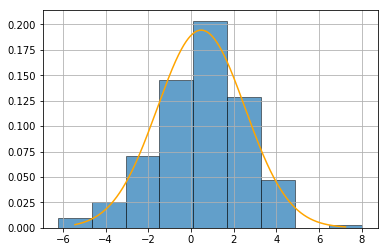

In [24]:
graphics(xi_x, w_x, h, sm_x, math.sqrt(dsp_x), 1, a0, af)

In [25]:
XB = round(sum(st_fifth), 5)
l = m - 3
print(l)
XKP = [9.5, 11.1, 12.6, 14.1, 15.5]
check(XKP, XB, l)

6
10.24677 <= 12.6, значит не противоречит эксперементальным данным


# 3-2

In [44]:
arr_x = [6.47386, 1.67515, 6.54487, 5.64946, 1.29949, 5.89687, 2.14135, 4.15024, 2.2858, 7.50013, 
5.69788, 8.01511, 1.50469, 2.31487, 6.92422, 7.65493, 8.06623, 6.39151, 3.7861, 7.69264, 
3.91903, 9.40849, 2.98681, 9.22948, 8.46664, 5.73658, 8.36728, 2.10238, 4.44499, 5.22772, 
8.4067, 7.7272, 5.49169, 2.88214, 2.23306, 2.02462, 9.33685, 2.28796, 1.90564, 2.60863, 
9.45007, 6.57493, 7.05148, 6.11305, 9.00232, 3.45256, 3.75415, 5.17669, 1.26421, 8.38681, 
3.6466, 4.86952, 8.77291, 1.08196, 4.12873, 9.60766, 1.30939, 7.94923, 3.19399, 1.77631, 
1.17097, 1.5163, 9.60973, 5.38027, 4.36534, 8.27197, 6.02998, 8.95462, 3.00751, 8.13472, 
1.123, 4.38712, 4.68223, 8.27197, 1.85992, 4.9651, 2.14396, 5.15005, 1.0402, 2.5369, 
8.17873, 9.68911, 5.51725, 5.47972, 2.24971, 4.1164, 8.92843, 6.5689, 2.40766, 3.15547, 
1.27978, 7.44532, 9.4165, 2.65894, 1.91995, 4.9543, 6.01693, 5.80462, 5.11693, 8.66374, 
5.80219, 4.86007, 8.42974, 4.22926, 4.0327, 7.00045, 7.66852, 6.67195, 2.97106, 2.61223, 
8.7649, 3.37237, 0.92545, 9.277, 7.7074, 4.50061, 2.12002, 2.33863, 2.72923, 7.90072, 
4.33384, 9.56455, 4.86898, 7.75735, 8.32093, 4.58152, 3.07915, 8.31121, 6.72793, 2.38804, 
9.16468, 3.98347, 1.29211, 2.41459, 3.60853, 1.76488, 6.15715, 4.67476, 3.83623, 3.7249, 
3.13495, 4.31521, 2.04127, 3.6745, 5.63272, 1.3462, 3.02452, 5.30413, 5.15104, 6.60058, 
5.57332, 2.51188, 8.85373, 9.58381, 8.00503, 2.27617, 4.70635, 5.87878, 2.7673, 8.91367, 
6.8002, 8.40175, 9.23785, 2.72635, 9.65383, 4.21423, 1.68928, 7.01026, 9.57067, 3.70015, 
4.47433, 0.84742, 1.26817, 5.39809, 7.69354, 5.3251, 5.92468, 3.68341, 3.78529, 6.91747, 
4.35814, 6.74818, 8.92735, 7.98235, 6.20719, 9.43027, 8.11366, 5.72254, 5.07661, 8.15587, 
5.68366, 7.57447, 7.44118, 4.10299, 6.12394, 7.67176, 6.79867, 5.79427, 2.60116, 5.74162, 
1.54024, 6.8155, 5.62336, 2.68225, 9.64645, 7.45639, 2.96737, 1.82059, 2.68927, 4.22332, 
8.6902, 4.72939, 5.15104, 8.82934, 6.3331, 9.16747, 8.61721, 8.90341, 2.88259, 9.55843, 
5.14321, 0.70108, 9.50002, 4.29748, 7.3411, 2.91571, 1.96585, 4.78114, 9.36826, 5.01568, 
8.23417, 4.76485, 5.68591, 4.60969, 4.67395, 8.30779, 1.01599, 8.19502, 9.09502, 3.8716, 
6.25192, 4.78546, 1.38751, 9.09646, 0.70009, 2.62168, 7.43299, 5.15293, 8.20087, 8.8306, 
6.11647, 1.96981, 5.86303, 6.10216, 7.2574, 5.98057, 6.70912, 5.40079, 3.33772, 2.81266, 
3.16519, 9.28321, 1.61674, 6.57907, 6.92593, 5.81353, 1.2058, 2.06098, 9.06136, 8.34433]
arr_print(arr_x)

6.47386	1.67515	6.54487	5.64946	1.29949	5.89687	2.14135	4.15024	2.2858	7.50013	
5.69788	8.01511	1.50469	2.31487	6.92422	7.65493	8.06623	6.39151	3.7861	7.69264	
3.91903	9.40849	2.98681	9.22948	8.46664	5.73658	8.36728	2.10238	4.44499	5.22772	
8.4067	7.7272	5.49169	2.88214	2.23306	2.02462	9.33685	2.28796	1.90564	2.60863	
9.45007	6.57493	7.05148	6.11305	9.00232	3.45256	3.75415	5.17669	1.26421	8.38681	
3.6466	4.86952	8.77291	1.08196	4.12873	9.60766	1.30939	7.94923	3.19399	1.77631	
1.17097	1.5163	9.60973	5.38027	4.36534	8.27197	6.02998	8.95462	3.00751	8.13472	
1.123	4.38712	4.68223	8.27197	1.85992	4.9651	2.14396	5.15005	1.0402	2.5369	
8.17873	9.68911	5.51725	5.47972	2.24971	4.1164	8.92843	6.5689	2.40766	3.15547	
1.27978	7.44532	9.4165	2.65894	1.91995	4.9543	6.01693	5.80462	5.11693	8.66374	
5.80219	4.86007	8.42974	4.22926	4.0327	7.00045	7.66852	6.67195	2.97106	2.61223	
8.7649	3.37237	0.92545	9.277	7.7074	4.50061	2.12002	2.33863	2.72923	7.90072	
4.33384	9.56455	4.86898	7.75735	8.32093	4.58152	

In [45]:
arr_x.sort()
arr_print(arr_x)
N = len(arr_x)
m = 1 + math.floor(math.log2(N))

0.70009	0.70108	0.84742	0.92545	1.01599	1.0402	1.08196	1.123	1.17097	1.2058	
1.26421	1.26817	1.27978	1.29211	1.29949	1.30939	1.3462	1.38751	1.50469	1.5163	
1.54024	1.61674	1.67515	1.68928	1.76488	1.77631	1.82059	1.85992	1.90564	1.91995	
1.96585	1.96981	2.02462	2.04127	2.06098	2.10238	2.12002	2.14135	2.14396	2.23306	
2.24971	2.27617	2.2858	2.28796	2.31487	2.33863	2.38804	2.40766	2.41459	2.51188	
2.5369	2.60116	2.60863	2.61223	2.62168	2.65894	2.68225	2.68927	2.72635	2.72923	
2.7673	2.81266	2.88214	2.88259	2.91571	2.96737	2.97106	2.98681	3.00751	3.02452	
3.07915	3.13495	3.15547	3.16519	3.19399	3.33772	3.37237	3.45256	3.60853	3.6466	
3.6745	3.68341	3.70015	3.7249	3.75415	3.78529	3.7861	3.83623	3.8716	3.91903	
3.98347	4.0327	4.10299	4.1164	4.12873	4.15024	4.21423	4.22332	4.22926	4.29748	
4.31521	4.33384	4.35814	4.36534	4.38712	4.44499	4.47433	4.50061	4.58152	4.60969	
4.67395	4.67476	4.68223	4.70635	4.72939	4.76485	4.78114	4.78546	4.86007	4.86898	
4.86952	4.9543	4.9651	5.01568	5.07661	5.1169

In [46]:
a0 = 0.7
af = 9.7
int_x = []
n_x = []
w_x = []
group(a0, af, arr_x, int_x, n_x, w_x)

Интервалы		ni	wi
[0.7,1.7]	24	0.08889
(1.7,2.7]	34	0.12593
(2.7,3.7]	24	0.08889
(3.7,4.7]	31	0.11481
(4.7,5.7]	35	0.12963
(5.7,6.7]	30	0.11111
(6.7,7.7]	25	0.09259
(7.7,8.7]	31	0.11481
(8.7,9.7]	36	0.13333
			270	1.0


In [47]:
h = (af - a0) / m

In [48]:
xi_x = []
as_static_row(int_x, n_x, w_x, xi_x)

xi		ni	wi
1.2	24	0.08889
2.2	34	0.12593
3.2	24	0.08889
4.2	31	0.11481
5.2	35	0.12963
6.2	30	0.11111
7.2	25	0.09259
8.2	31	0.11481
9.2	36	0.13333


In [49]:
sm_x = sample_mean(xi_x, w_x, 1)
print(sm_x)

5.34805


In [50]:
dsp_x = dispersion(xi_x, w_x, sm_x, h)
print(math.sqrt(dsp_x))

2.5630099492588787


In [33]:
ft_second = []
ft_third = []
ft_fourth = []
ft_fifth = []
create_first_table(sm_x, math.sqrt(dsp_x), int_x, ft_second, ft_third, ft_fourth, ft_fifth)

In [34]:
st_fourth = []
st_fifth = []
ft_fifth = []
for i in range(len(w_x)):
    ft_fifth.append(1 / m)
create_second_table(w_x, ft_fifth, st_fourth, st_fifth, N)
print_second_table(int_x, w_x, ft_fifth, st_fourth, st_fifth)

1	[0.7,1.7]	0.08889	0.11111	0.02222	1.19988
2	(1.7,2.7]	0.12593	0.11111	0.01482	0.53363
3	(2.7,3.7]	0.08889	0.11111	0.02222	1.19988
4	(3.7,4.7]	0.11481	0.11111	0.0037	0.03325
5	(4.7,5.7]	0.12963	0.11111	0.01852	0.83337
6	(5.7,6.7]	0.11111	0.11111	0.0	0.0
7	(6.7,7.7]	0.09259	0.11111	0.01852	0.83357
8	(7.7,8.7]	0.11481	0.11111	0.0037	0.03325
9	(8.7,9.7]	0.13333	0.11111	0.02222	1.19964
				1.0	1.0	0.022221111111111108	5.866453538999999


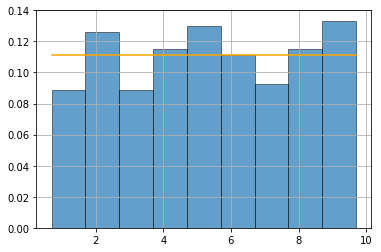

In [35]:
graphics(xi_x, w_x, h, sm_x, math.sqrt(dsp_x), 2, a0, af)

In [36]:
XB = round(sum(st_fifth), 5)
l = m - 1
print(l)
XKP = [9.5, 11.1, 12.6, 14.1, 15.5]
check(XKP, XB, l)

8
5.86645 <= 15.5, значит не противоречит эксперементальным данным
